In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
sns.set()

In [51]:
df=pd.read_csv(r'C:\Users\FMC OWO\Downloads\listings.csv')

In [52]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,1.44255,103.79580,Private room,83,180,1,10/21/2013,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,1.33235,103.78521,Private room,81,90,18,12/26/2014,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,1.44246,103.79667,Private room,69,6,20,10/1/2015,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,1.34541,103.95712,Private room,206,1,14,8/11/2019,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,1.34567,103.95963,Private room,94,1,22,7/28/2019,0.22,9,355


## DATA CLEANING 

In [53]:
df.shape

(7907, 15)

In [54]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Get an overview of your data-set using the info() and describe() methods

In [55]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   latitude                        7907 non-null   float64
 6   longitude                       7907 non-null   float64
 7   room_type                       7907 non-null   object 
 8   price                           7907 non-null   int64  
 9   minimum_nights                  7907 non-null   int64  
 10  number_of_reviews               7907 non-null   int64  
 11  last_review                     5149 non-null   object 
 12  reviews_per_month               51

In [57]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [58]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.00
neighbourhood_group                0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       34.88
reviews_per_month                 34.88
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [59]:
len(df['reviews_per_month'].unique())

528

In [60]:
df['reviews_per_month'].describe()

count    5149.000000
mean        1.043669
std         1.285851
min         0.010000
25%         0.180000
50%         0.550000
75%         1.370000
max        13.000000
Name: reviews_per_month, dtype: float64

In [61]:
df['reviews_per_month'].mode()

0    1.0
dtype: float64

In [62]:
#The price of properties with no review might be important info
df['reviews_per_month'].fillna(0, inplace = True)

In [63]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [64]:
#checking whether rows of missing values in the 'number of reviews' corresponds with that of 'last review'
(df[df['reviews_per_month']==0]).isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [65]:
len(df['last_review'].unique())

1002

In [66]:
df['last_review'].unique()

array(['10/21/2013', '12/26/2014', '10/1/2015', ..., '4/9/2019',
       '6/17/2019', '3/22/2019'], dtype=object)

In [67]:
df['Year']=df['last_review'].copy()

In [68]:
df['Year'].isnull().sum()

2758

In [69]:
df['Year'].fillna('0/0/0000', inplace = True)

In [70]:
df['Year']=df['Year'].str.split('/')
df['Year']

0       [10, 21, 2013]
1       [12, 26, 2014]
2        [10, 1, 2015]
3        [8, 11, 2019]
4        [7, 28, 2019]
5        [8, 15, 2019]
6        [7, 25, 2019]
7        [5, 31, 2019]
8        [4, 28, 2019]
9        [7, 31, 2019]
10       [4, 21, 2019]
11       [9, 13, 2018]
12        [1, 1, 2019]
13       [8, 22, 2019]
14        [2, 2, 2019]
15       [4, 27, 2019]
16       [8, 22, 2016]
17       [8, 11, 2019]
18        [0, 0, 0000]
19       [7, 10, 2019]
20       [8, 15, 2019]
21        [8, 7, 2017]
22        [8, 4, 2019]
23        [0, 0, 0000]
24       [8, 11, 2019]
25        [1, 7, 2018]
26        [0, 0, 0000]
27       [8, 12, 2017]
28        [0, 0, 0000]
29        [0, 0, 0000]
30       [8, 24, 2019]
31       [7, 26, 2019]
32       [1, 31, 2018]
33        [0, 0, 0000]
34       [8, 21, 2019]
35       [8, 11, 2019]
36        [0, 0, 0000]
37        [0, 0, 0000]
38       [2, 22, 2014]
39       [8, 16, 2019]
40        [2, 9, 2018]
41       [5, 27, 2019]
42       [2, 12, 2018]
43        [

In [71]:
df['Year']=df['Year'].apply (lambda x:x[2])

In [72]:
df['Year'].unique()

array(['2013', '2014', '2015', '2019', '2018', '2016', '0000', '2017'],
      dtype=object)

In [73]:
#replace missing last view date with lowest date available
df['last_review'].fillna('1/1/2012', inplace = True)

In [74]:
df.isnull().sum()

id                                0
name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [75]:
len(df['host_id'].unique())

2705

In [76]:
len(df['id'].unique())

7907

In [77]:
len(df['name'].unique())

7456

In [78]:
df.drop(['name','id','host_name'],axis=1,inplace=True)

In [79]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [80]:
df.dtypes

host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Year                               object
dtype: object

In [81]:
#df['last_review'] = pd.to_datetime(df['last_review'], format=%d/%m/%y)

In [82]:
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)

In [83]:
cat=[col for col in df.columns if df[col].dtype=='O']

In [84]:
for col in cat:
    print(col)
    print(df[col].unique())

neighbourhood_group
['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']
room_type
['Private room' 'Entire home/apt' 'Shared room']
Year
['2013' '2014' '2015' '2019' '2018' '2016' '0000' '2017']


## Exploratory Data Analysis EDA

(array([1548.,  156.,  287.,  297.,  386.,   73.,  121.,  120.,  204.,
         305.,   45.,   73.,  102.,  175.,  252.,  157.,  280.,  381.,
         599., 2346.]),
 array([  0.  ,  18.25,  36.5 ,  54.75,  73.  ,  91.25, 109.5 , 127.75,
        146.  , 164.25, 182.5 , 200.75, 219.  , 237.25, 255.5 , 273.75,
        292.  , 310.25, 328.5 , 346.75, 365.  ]),
 <a list of 20 Patch objects>)

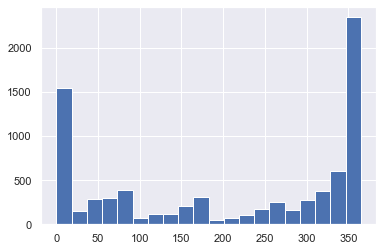

In [85]:
#Room availability distribution
plt.hist(df['availability_365'],density=False,bins=20)

In [86]:
#Neighbourhood region representation
region=df['neighbourhood_group'].value_counts()
region

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

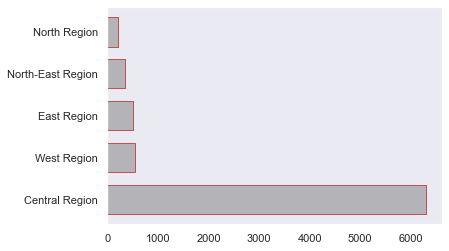

In [87]:
region.plot.barh(color=(0.5, 0.5, 0.5, 0.5),edgecolor='r', width=0.7)
plt.grid()

In [88]:
#Room types freuency
rooms=df['room_type'].value_counts()
rooms

Entire home/apt    4132
Private room       3381
Shared room         394
Name: room_type, dtype: int64

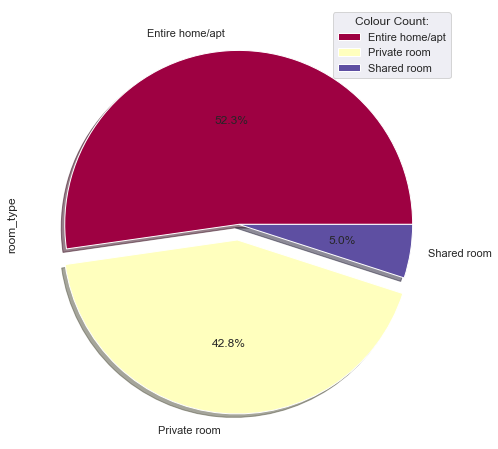

In [89]:
plt.subplots(figsize=(8,8))
rooms.plot.pie(explode = [0.00,0.09,0.00],shadow=True,autopct='%1.1f%%',cmap='Spectral')

plt.legend(title = "Colour Count:")
plt.show()

In [90]:
#Average room type price 
avr_room_price=df.groupby('room_type')['price'].mean().to_frame()

avr_room_price

,price
room_type,
Entire home/apt,226.998306
Private room,110.938480
Shared room,65.675127


In [91]:
room_price=df.groupby('room_type')['price'].sum()
room_price=pd.DataFrame(room_price,columns=['price'])
room_price

,price
room_type,
Entire home/apt,937957
Private room,375083
Shared room,25876


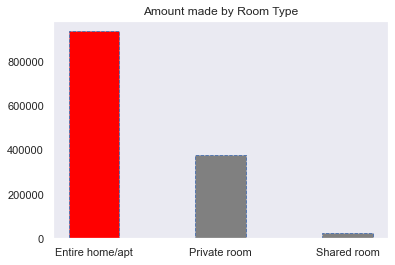

In [92]:
#Bar chart of the average price of the different cut categories, showing the largest value
x=room_price.index
y=room_price['price']

clrs = ['grey' if (x < max(y)) else 'red' for x in y ]
plt.title('Amount made by Room Type')
plt.bar(x, y, color=clrs, width=0.4,linestyle='--',edgecolor='b',lw=0.9)
plt.grid()
plt.show() 

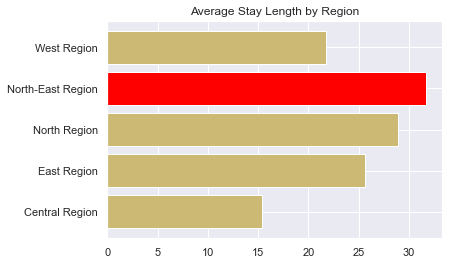

In [93]:
#Average length of stay by region
Region_stay=df.groupby('neighbourhood_group')['minimum_nights'].mean()
Region_stay=pd.DataFrame(Region_stay,columns=['minimum_nights'])

x=Region_stay.index
y=Region_stay['minimum_nights']

clrs = ['y' if (x < max(y)) else 'red' for x in y ]
plt.title('Average Stay Length by Region')
plt.barh(x, y, color=clrs)
plt.show()

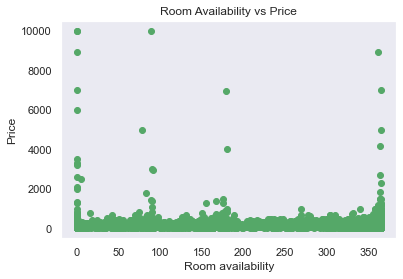

In [94]:
#Relationshp between Roo availabilty and price
plt.scatter(df['availability_365'],df['price'],c='g')
plt.xlabel('Room availability')
plt.ylabel('Price')
plt.title('Room Availability vs Price')
plt.grid()

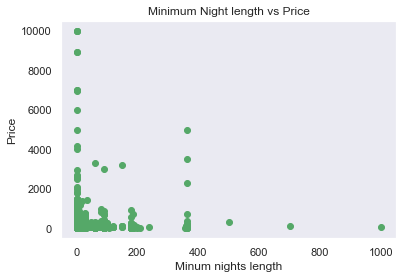

In [95]:
plt.scatter(df['minimum_nights'],df['price'],c='g')
plt.xlabel('Minum nights length')
plt.ylabel('Price')
plt.title('Minimum Night length vs Price')
plt.grid()

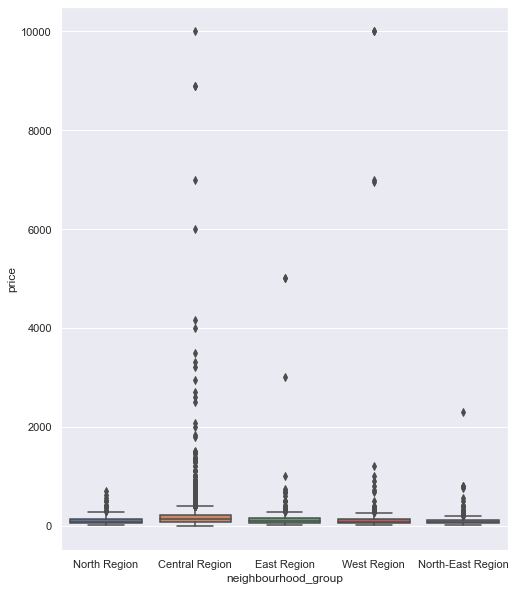

In [96]:
#Neighbourhood region price patterns
plt.subplots(figsize=(8,10))
sns.boxplot(x='neighbourhood_group',y='price',data=df)

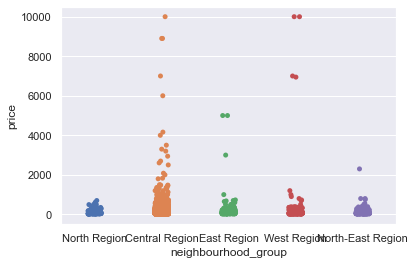

In [97]:
sns.stripplot(x=df['neighbourhood_group'],y=df['price'])

In [49]:
plt.figure(figsize=(6,6))
sns.histplot(df['price'])
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 432x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x19be17c9cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x19be17ebe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x19be17c9af0>],
 'medians': [<matplotlib.lines.Line2D at 0x19be1826610>],
 'fliers': [<matplotlib.lines.Line2D at 0x19be181f5b0>],
 'means': [<matplotlib.lines.Line2D at 0x19be1828490>]}

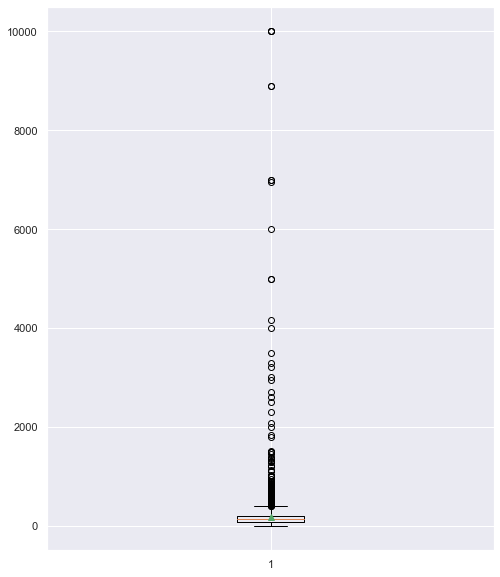

In [98]:
plt.subplots(figsize=(8,10))
plt.boxplot(df['price'], showmeans=True)


## Preprocessing

### Outlier check and handling

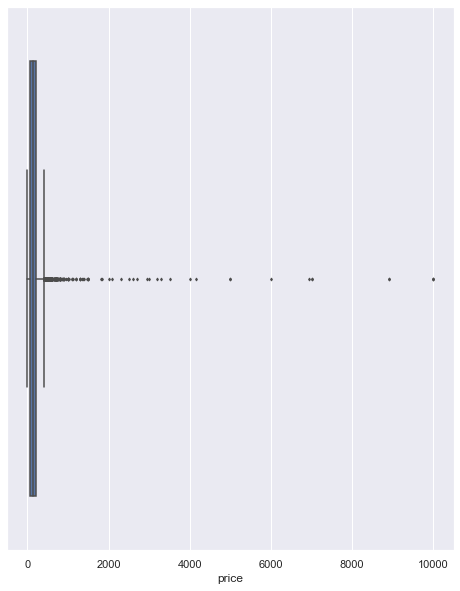

In [99]:
plt.figure(figsize=(8,10))
sns.boxplot(df['price'],fliersize=2)

In [100]:
#Count how many prices among the outliers
df[df['price']>500].shape[0]

198

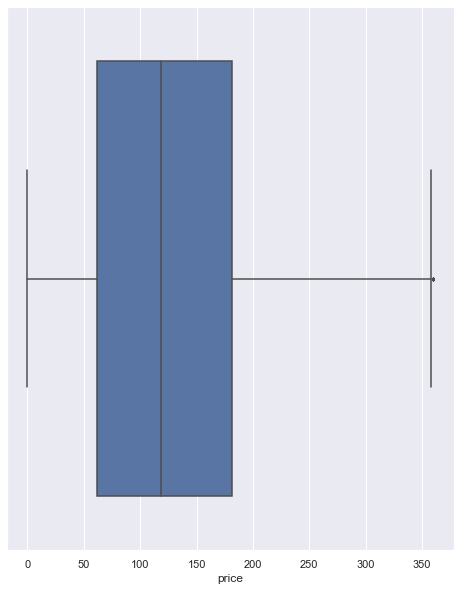

In [101]:
df2=df[df['price']<=360]
plt.figure(figsize=(8,10))
sns.boxplot(df2['price'],fliersize=2)

In [102]:
#deleting every data point containing the outliers

df2=df[df['price']<=360]


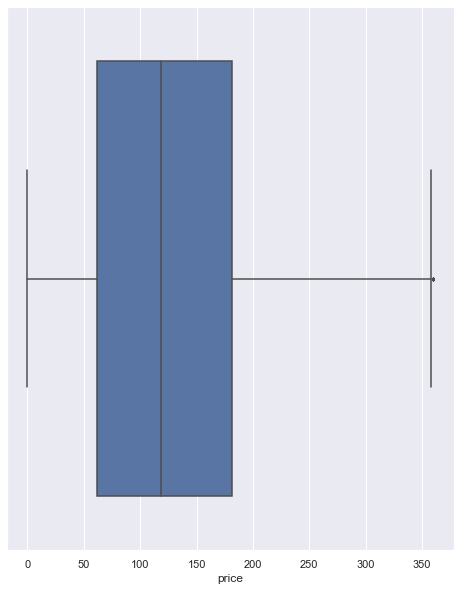

In [103]:
plt.subplots(figsize=(8,10))
sns.boxplot(df2['price'],fliersize=2)

### Encoding categories

In [104]:
cat=[col for col in df.columns if df[col].dtype=='O']
cat

['neighbourhood_group', 'room_type', 'Year']

In [105]:
for col in cat:
    print(col)
    print(df[col].unique())

neighbourhood_group
['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']
room_type
['Private room' 'Entire home/apt' 'Shared room']
Year
['2013' '2014' '2015' '2019' '2018' '2016' '0000' '2017']


In [106]:
(pd.get_dummies(df2['neighbourhood_group'])).head()


,Central Region,East Region,North Region,North-East Region,West Region
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [107]:
df3=pd.concat([df2, pd.get_dummies(df2[['neighbourhood_group','room_type']],drop_first=True)],axis=1)

In [108]:
df3.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,North Region,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365,2013,0,1,0,0,1,0
1,227796,Central Region,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,2014,0,0,0,0,1,0
2,266763,North Region,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365,2015,0,1,0,0,1,0
3,367042,East Region,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353,2019,1,0,0,0,1,0
4,367042,East Region,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355,2019,1,0,0,0,1,0


In [109]:
#Joinining the encoded columns with the orignal dataset
#df3=pd.concat([df3, pd.get_dummies(df2['room_type'])],axis=1)

In [110]:
df3.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,North Region,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365,2013,0,1,0,0,1,0
1,227796,Central Region,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,2014,0,0,0,0,1,0
2,266763,North Region,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365,2015,0,1,0,0,1,0
3,367042,East Region,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353,2019,1,0,0,0,1,0
4,367042,East Region,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355,2019,1,0,0,0,1,0


In [111]:
df3.isnull().sum()

host_id                                  0
neighbourhood_group                      0
latitude                                 0
longitude                                0
room_type                                0
price                                    0
minimum_nights                           0
number_of_reviews                        0
last_review                              0
reviews_per_month                        0
calculated_host_listings_count           0
availability_365                         0
Year                                     0
neighbourhood_group_East Region          0
neighbourhood_group_North Region         0
neighbourhood_group_North-East Region    0
neighbourhood_group_West Region          0
room_type_Private room                   0
room_type_Shared room                    0
dtype: int64

In [112]:
#droppng the originl categorical columns
df3.drop(['room_type','neighbourhood_group','Year'],axis=1,inplace=True)

In [113]:
df3.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,1.44255,103.79580,83,180,1,2013-10-21,0.01,2,365,0,1,0,0,1,0
1,227796,1.33235,103.78521,81,90,18,2014-12-26,0.28,1,365,0,0,0,0,1,0
2,266763,1.44246,103.79667,69,6,20,2015-10-01,0.20,2,365,0,1,0,0,1,0
3,367042,1.34541,103.95712,206,1,14,2019-08-11,0.15,9,353,1,0,0,0,1,0
4,367042,1.34567,103.95963,94,1,22,2019-07-28,0.22,9,355,1,0,0,0,1,0


In [114]:
df3['last_review_day']=df3['last_review'].dt.day
df3['last_review_month']=df3['last_review'].dt.month
df3['last_review_year']=df3['last_review'].dt.year

In [115]:
df3.dtypes

host_id                                           int64
latitude                                        float64
longitude                                       float64
price                                             int64
minimum_nights                                    int64
number_of_reviews                                 int64
last_review                              datetime64[ns]
reviews_per_month                               float64
calculated_host_listings_count                    int64
availability_365                                  int64
neighbourhood_group_East Region                   uint8
neighbourhood_group_North Region                  uint8
neighbourhood_group_North-East Region             uint8
neighbourhood_group_West Region                   uint8
room_type_Private room                            uint8
room_type_Shared room                             uint8
last_review_day                                   int64
last_review_month                               

### 

In [116]:
df3.shape

(7465, 19)

In [117]:
df3.drop('last_review',axis=1,inplace=True)

In [118]:
#Correlation check for multi-colinearity
R_corr=df3.corr()
R_corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,last_review_day,last_review_month,last_review_year
host_id,1.000000,-0.034976,-0.018347,0.137207,-0.086994,-0.171839,0.042775,-0.065277,0.031410,-0.033522,-0.003509,-0.020512,0.004162,-0.099244,0.003498,-0.127190,-0.144306,-0.136958
latitude,-0.034976,1.000000,-0.039805,-0.193286,0.079498,-0.010143,-0.029241,-0.158215,-0.065936,0.133258,0.561366,0.425901,0.264852,0.225879,-0.064336,-0.008663,-0.020478,-0.056909
longitude,-0.018347,-0.039805,1.000000,0.026925,-0.034765,0.105870,0.100434,0.050067,-0.040369,0.487298,-0.129893,0.150845,-0.677438,-0.062457,-0.020050,0.018563,0.024997,0.041076
price,0.137207,-0.193286,0.026925,1.000000,-0.103779,-0.063329,-0.011324,0.239132,0.101718,-0.084084,-0.081899,-0.135194,-0.097387,-0.539196,-0.236549,-0.063175,-0.063482,-0.055937
minimum_nights,-0.086994,0.079498,-0.034765,-0.103779,1.000000,-0.078693,-0.152073,-0.014064,0.161170,0.045937,0.043997,0.063021,0.027560,0.079370,-0.077422,-0.108812,-0.142756,-0.195695
number_of_reviews,-0.171839,-0.010143,0.105870,-0.063329,-0.078693,1.000000,0.678387,-0.152160,-0.068247,0.055805,-0.017793,-0.004579,-0.060796,0.027122,-0.002190,0.209281,0.321807,0.352945
reviews_per_month,0.042775,-0.029241,0.100434,-0.011324,-0.152073,0.678387,1.000000,-0.180813,-0.110375,0.017159,-0.011641,-0.008380,-0.073661,0.008928,-0.027645,0.312970,0.455500,0.494380
calculated_host_listings_count,-0.065277,-0.158215,0.050067,0.239132,-0.014064,-0.152160,-0.180813,1.000000,0.246540,-0.115453,-0.065278,-0.125259,-0.076793,-0.336252,-0.076938,-0.079531,-0.140941,-0.091664
availability_365,0.031410,-0.065936,-0.040369,0.101718,0.161170,-0.068247,-0.110375,0.246540,1.000000,-0.059800,0.007848,-0.060002,-0.033653,-0.051410,0.110696,-0.059578,-0.061135,-0.033898
neighbourhood_group_East Region,-0.033522,0.133258,0.487298,-0.084084,0.045937,0.055805,0.017159,-0.115453,-0.059800,1.000000,-0.043436,-0.057730,-0.073213,0.153436,-0.040283,0.019442,0.011303,0.009669


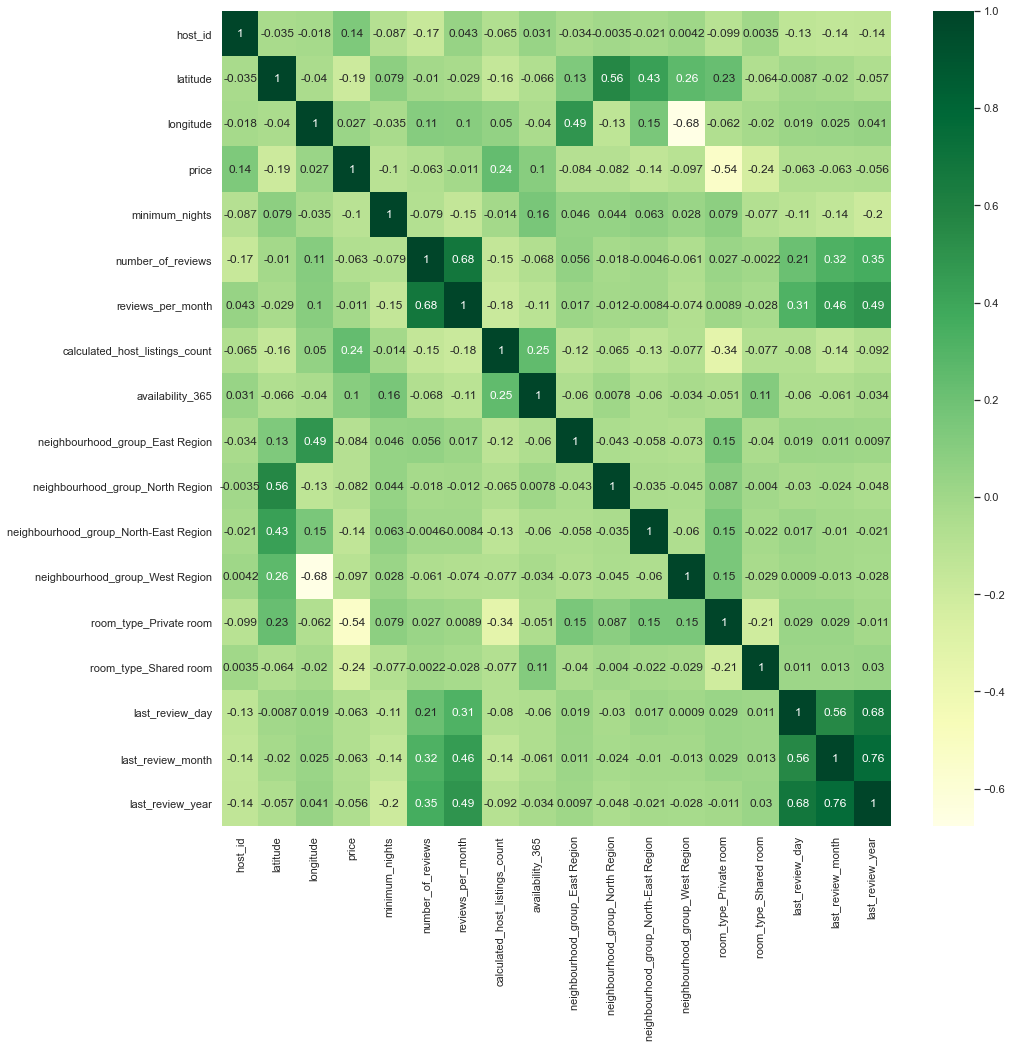

In [119]:
plt.figure(figsize=(15,15))
sns.heatmap(R_corr,cmap='YlGn',annot=True)

The 'Entire home/apt' column has a high correlation with the 'Private room' column, so to avoid multi-collinearity we will be dropping one of them'

In [120]:
df3.head(1)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,last_review_day,last_review_month,last_review_year
0,266763,1.44255,103.7958,83,180,1,0.01,2,365,0,1,0,0,1,0,21,10,2013


In [121]:
#Import important libraries for training,preprocessing and evaluation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 

In [122]:

scaler = StandardScaler() #prepare the scaler
X = df3.drop('price', axis=1) #assign the all features to X variable.
#X = scaler.fit_transform(X) #notice we drop away the target before applying scaling. Do not scale the target.
y = df3['price'] #assign the target to y variable


In [123]:
X.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,last_review_day,last_review_month,last_review_year
0,266763,1.44255,103.79580,180,1,0.01,2,365,0,1,0,0,1,0,21,10,2013
1,227796,1.33235,103.78521,90,18,0.28,1,365,0,0,0,0,1,0,26,12,2014
2,266763,1.44246,103.79667,6,20,0.20,2,365,0,1,0,0,1,0,1,10,2015
3,367042,1.34541,103.95712,1,14,0.15,9,353,1,0,0,0,1,0,11,8,2019
4,367042,1.34567,103.95963,1,22,0.22,9,355,1,0,0,0,1,0,28,7,2019


### Feature  Selection

In [124]:

from sklearn.feature_selection import mutual_info_classif

In [125]:
mutual_info_classif(X,y)

array([0.73198439, 0.34768367, 0.39949396, 0.26981366, 0.05471348,
       0.06188954, 0.6418478 , 0.24064121, 0.02192699, 0.        ,
       0.01177119, 0.00882119, 0.27719127, 0.08668356, 0.05609818,
       0.08788664, 0.13609522])

In [126]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [127]:
imp

,0
host_id,0.737204
latitude,0.348016
longitude,0.399641
minimum_nights,0.256349
number_of_reviews,0.050607
reviews_per_month,0.057115
calculated_host_listings_count,0.639823
availability_365,0.241964
neighbourhood_group_East Region,0.042224
neighbourhood_group_North Region,0.003998


In [128]:
imp.columns=['Importance']

In [129]:
#sorting features by importance
imp.sort_values(by='Importance',ascending=False)

,Importance
host_id,0.737204
calculated_host_listings_count,0.639823
longitude,0.399641
latitude,0.348016
room_type_Private room,0.277541
minimum_nights,0.256349
availability_365,0.241964
last_review_month,0.108687
last_review_year,0.102656
room_type_Shared room,0.092129


In [130]:
#selecing the top features
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

imp

imp.columns=['Importance']

imp[imp['Importance']>=0.09].sort_values(by='Importance',ascending=False)

,Importance
host_id,0.732916
calculated_host_listings_count,0.642151
longitude,0.399676
latitude,0.347788
minimum_nights,0.271429
room_type_Private room,0.267952
availability_365,0.236823
last_review_year,0.121858


In [131]:
imp.sort_values(by='Importance',ascending=False)

,Importance
host_id,0.732916
calculated_host_listings_count,0.642151
longitude,0.399676
latitude,0.347788
minimum_nights,0.271429
room_type_Private room,0.267952
availability_365,0.236823
last_review_year,0.121858
room_type_Shared room,0.080522
last_review_month,0.078804


In [132]:
#dropping the unimportant features
#X=X[['host_id','calculated_host_listings_count','Entire home/apt','longitude','latitude','minimum_nights','availability_365','Central Region','last_review_year']]
#X.head()

In [133]:
X.shape

(7465, 17)

In [134]:
X.drop('last_review_day',axis=1,inplace=True)

In [135]:
#fitting our scaler
scaler.fit(X)  

StandardScaler()

In [136]:
#scaler.fit_transform(x)

In [137]:
#scaling our data
X = scaler.transform(X)

In [138]:
X

array([[-1.09275123,  4.17139226, -1.20172933, ..., -0.23382999,
         1.55262719, -1.02772424],
       [-1.09322673,  0.57551096, -1.44115617, ..., -0.23382999,
         2.14302333, -0.7135957 ],
       [-1.09275123,  4.16845551, -1.1820597 , ..., -0.23382999,
         1.55262719, -0.39946715],
       ...,
       [ 2.3384184 , -0.06045752,  0.24884914, ..., -0.23382999,
        -1.10415547, -1.34185279],
       [ 1.87943483, -0.62920717, -0.24741329, ..., -0.23382999,
        -1.10415547, -1.34185279],
       [-0.74470955, -0.58711382, -0.35503102, ..., -0.23382999,
        -1.10415547, -1.34185279]])

In [139]:
#splitting our data into the testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123) #To do your data splitting

## Model Evaluation

**LINEAR REGRESSION**

In [140]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(X_train, y_train)

LinearRegression()

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [142]:

#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE)
y_train_pred1 = linear_regression.predict(X_train) #Train (Already seen this)
y_pred1 = linear_regression.predict(X_test) # Test(New)

print('Train r2 score: ', r2_score(y_train,y_train_pred1))
print('Test r2 score: ', r2_score(y_test, y_pred1))

print('train_mae: ', mean_absolute_error(y_train,y_train_pred1))
print('test_mae: ', mean_absolute_error(y_test, y_pred1))

print('train_mse1: ', mean_squared_error(y_train,y_train_pred1))
print('test_mse1: ', mean_squared_error(y_test,y_pred1 ))





Train r2 score:  0.45953063836937924
Test r2 score:  0.44814565456262756
train_mae:  45.292479362795376
test_mae:  46.44436312694303
train_mse1:  3519.8620600017325
test_mse1:  3631.6466872700207


In [143]:
y_pred1

array([180.71590739, 120.05377264, 103.17076559, ..., 163.87760134,
       174.26716078, 169.60707653])

In [144]:
y_test

6013    157
4723    144
6570    131
3924    100
629     268
557      50
7504    247
5007    128
5146     71
3407    250
6390    200
4686    258
1213    119
6237    111
6073    169
4076    156
195     181
1402    187
5672    137
6212    240
311      50
4410    350
3281    154
4265     57
4264     57
2260    128
4445     37
7705     58
4504    131
1013    150
1641     57
4302    347
6349    199
6385    128
905      72
4968    200
7268    201
2441    187
3993     32
5380    150
2404     60
5150    200
1212     75
6036    106
5581    110
1016     49
6628    287
6050    189
7817    124
771     119
1069    199
4716    200
7800    144
1166    131
3380     62
910      28
177      83
4290    131
2513     56
326     146
621      85
3524     28
1516     65
2499    131
6479    168
2313     28
3969    125
991     175
201     250
6936    124
1541    218
6128     49
7219    281
6740    160
2411     40
5815    176
3336     56
1232    137
76       60
321     287
7742     60
1051     40
7162    199
469 

In [145]:
d=pd.DataFrame({'OLD':y_test, 'NEW':y_pred1})
d

,OLD,NEW
6013,157,180.715907
4723,144,120.053773
6570,131,103.170766
3924,100,180.922509
629,268,171.332001
557,50,80.231856
7504,247,189.028130
5007,128,178.288988
5146,71,91.917053
3407,250,180.884639


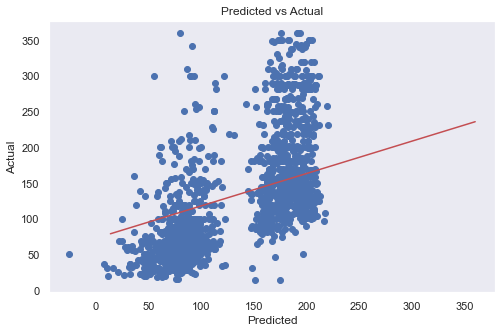

In [146]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred1,y_test)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred1, 1))(np.unique(y_test)),c='r')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [147]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=10,
                    weights='distance')

In [148]:
#Prediction and Model Evaluation
y_train_pred2 = knn.predict(X_train)
y_pred2 = knn.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))

train_mae=mean_absolute_error(y_train_pred1, y_train)
test_mae=mean_absolute_error(y_test, y_pred1)
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)

print('Train RMSE: ',train_rmse2)
print('Test RMSE:',test_rmse2)
print('Train:',train_mae)
print('Test MAE:',test_mae)

Train r2 score:  1.0
Test r2 score:  0.5877419682213942
Train RMSE:  0.0
Test RMSE: 52.08637396630175
Train: 45.292479362795376
Test MAE: 46.44436312694303


In [149]:
pd.DataFrame({'OLD':y_test, 'NEW':y_pred2})

,OLD,NEW
6013,157,131.248663
4723,144,90.612751
6570,131,113.034722
3924,100,202.778824
629,268,180.601547
557,50,65.385236
7504,247,214.091492
5007,128,179.316815
5146,71,74.735962
3407,250,195.203828


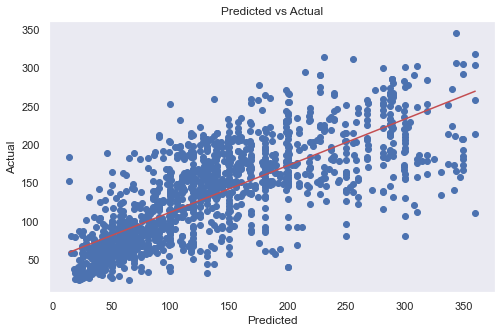

In [150]:
plt.subplots(figsize=(8,5))
plt.scatter(y_test,y_pred2)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred2, 1))(np.unique(y_test)),c='r')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

**DECISION TREE**

In [151]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
dtree = DecisionTreeRegressor()
# 3. Use the trainning data to train the estimator
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [152]:
y_train_pred3 = dtree.predict(X_train)
y_pred3 = dtree.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred3, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred3))
train_mae=mean_absolute_error(y_train_pred3, y_train)
test_mae=mean_absolute_error(y_test, y_pred3)
train_mse3 = mean_squared_error(y_train_pred3, y_train)
test_mse3 = mean_squared_error(y_pred3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)


print('Train RMSE: %.2f' % train_rmse3)
print('Test RMSE: %.2f' % test_rmse3)
print('Train MAE: %.2f' % train_mae)
print('Test MAE: %.2f' % test_mae)

Train r2 score:  1.0
Test r2 score:  0.36507781536505124
Train RMSE: 0.00
Test RMSE: 64.64
Train MAE: 0.00
Test MAE: 41.75


In [153]:
pd.DataFrame({'OLD':y_test, 'NEW':y_pred3})

,OLD,NEW
6013,157,165.0
4723,144,137.0
6570,131,90.0
3924,100,294.0
629,268,268.0
557,50,200.0
7504,247,210.0
5007,128,187.0
5146,71,62.0
3407,250,300.0


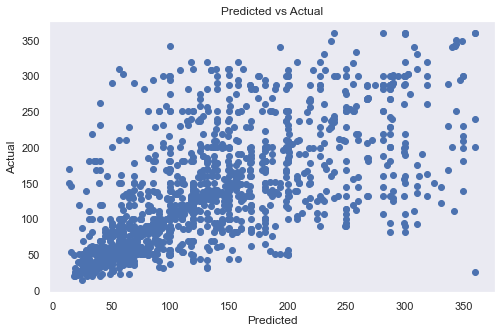

In [154]:
plt.subplots(figsize=(8,5))
plt.scatter(y_test,y_pred3)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

**D. RANDOM FOREST MODEL**

In [155]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here alsn_estimators=ng here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [156]:
y_train_pred4 = rf.predict(X_train)
y_pred4 = rf.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred4, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred4))
train_mse4 = mean_squared_error(y_train_pred4, y_train)
test_mse4 = mean_squared_error(y_pred4, y_test)
train_rmse4 = np.sqrt(train_mse4)
test_rmse4 = np.sqrt(test_mse4)



print('Train RMSE: %.2f' % train_rmse4)
print('Test RMSE: %.2f' % test_rmse4)
print('Train MAE: %.2f' % train_mae)
print('Test MAE: %.2f' % test_mae)

Train r2 score:  -0.17908587407314291
Test r2 score:  0.46807513727236394
Train RMSE: 58.54
Test RMSE: 59.16
Train MAE: 0.00
Test MAE: 41.75


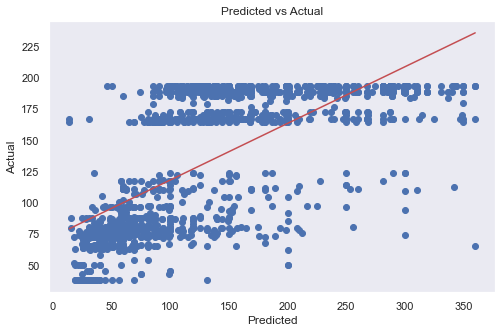

In [157]:
plt.subplots(figsize=(8,5))
plt.scatter(y_test,y_pred4)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred4, 1))(np.unique(y_test)),c='r')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [158]:
pd.DataFrame({'OLD':y_test, 'NEW':y_pred4})

,OLD,NEW
6013,157,188.065033
4723,144,117.360110
6570,131,78.204846
3924,100,193.496820
629,268,166.731419
557,50,80.089314
7504,247,166.731419
5007,128,169.650134
5146,71,106.703758
3407,250,172.163206


# E. XGBOOST 

In [159]:
from xgboost import XGBRegressor
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [160]:
y_train_pred5 = xgb_model1.predict(X_train)
y_pred5 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred5, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred5))
train_mse5 = mean_squared_error(y_train_pred5, y_train)
test_mse5 = mean_squared_error(y_pred5, y_test)
train_rmse5 = np.sqrt(train_mse5)
test_rmse5 = np.sqrt(test_mse5)


print('Train RMSE: %.2f' % train_rmse5)
print('Test RMSE: %.2f' % test_rmse5)
print('Train MAE: %.2f' % train_mae)
print('Test MAE: %.2f' % test_mae)

Train r2 score:  0.8920732193671096
Test r2 score:  0.6733236373911916
Train RMSE: 23.71
Test RMSE: 46.37
Train MAE: 0.00
Test MAE: 41.75


In [161]:
pd.DataFrame({'OLD':y_test, 'NEW':y_pred5})

,OLD,NEW
6013,157,159.028900
4723,144,100.178062
6570,131,89.575989
3924,100,175.270538
629,268,248.550262
557,50,91.701614
7504,247,190.170914
5007,128,181.911423
5146,71,56.207626
3407,250,191.289963


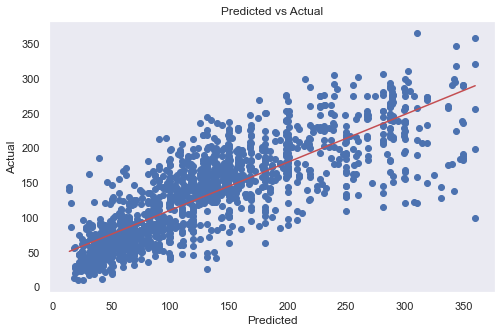

In [162]:
plt.subplots(figsize=(8,5))
plt.scatter(y_test,y_pred5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred5, 1))(np.unique(y_test)),c='r')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()


# XGBoost Model Hyperparameter Tunning

In [163]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=True)
y_train_pred6 = xgb_model2.predict(X_train)
y_pred6 = xgb_model2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred6, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred6))
train_mse6 = mean_squared_error(y_train_pred6, y_train)
test_mse6 = mean_squared_error(y_pred6, y_test)
train_rmse6 = np.sqrt(train_mse6)
test_rmse6 = np.sqrt(test_mse6)
print('Train RMSE: %.4f' % train_rmse6)
print('Test RMSE: %.4f' % test_rmse6)

[0]	validation_0-rmse:115.10849
[1]	validation_0-rmse:89.64381
[2]	validation_0-rmse:73.09216
[3]	validation_0-rmse:63.46041
[4]	validation_0-rmse:57.54427
[5]	validation_0-rmse:54.47673
[6]	validation_0-rmse:52.15126
[7]	validation_0-rmse:50.91446
[8]	validation_0-rmse:50.13041
[9]	validation_0-rmse:49.24998
[10]	validation_0-rmse:48.96089
[11]	validation_0-rmse:48.70823
[12]	validation_0-rmse:48.35639
[13]	validation_0-rmse:48.42061
[14]	validation_0-rmse:48.29960
[15]	validation_0-rmse:48.10275
[16]	validation_0-rmse:48.07869
[17]	validation_0-rmse:47.88477
[18]	validation_0-rmse:47.83107
[19]	validation_0-rmse:47.83967
[20]	validation_0-rmse:47.81401
[21]	validation_0-rmse:47.80606
[22]	validation_0-rmse:47.76426
[23]	validation_0-rmse:47.70054
[24]	validation_0-rmse:47.62319
[25]	validation_0-rmse:47.57574
[26]	validation_0-rmse:47.53125
[27]	validation_0-rmse:47.53347
[28]	validation_0-rmse:47.40864
[29]	validation_0-rmse:47.41858
[30]	validation_0-rmse:47.38548
[31]	validation_0

## Optimization

Model optimization is the problem of finding the set of inputs to a target objective function that result in the minimum or maximum of the evalution function.

e.g optimizing means that we want our model to give us a higher r2 value or a lower MSE,MAE or RMSE value

**USING GRID SEARCH CV FOR OPTIMIZATION**

In [164]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [167]:
#checking the parameters that can be optimized in the models
xgb_model1.get_params().keys() # choosen model for optimization

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [168]:
param_grid=({'n_estimators':[10,100,1000],'n_jobs':[2,4,6,8],'max_depth':[2,10,100]},
           {'n_estimators':[10,100,1000],'max_depth':[2,10,100],'n_jobs':[2,4,6,8]})

grid_search=GridSearchCV(xgb_model1,param_grid,cv=5,scoring='r2',return_train_score=True)

grid_search=grid_search.fit(X_train,y_train)

In [169]:
#### To see the best parameter for our model
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100, 'n_jobs': 2}

In [ ]:
dtree = XGBRegressor(max_depth= 10, n_estimators= 100, n_jobs= 2) #Notice here alsn_estimators=ng here "random forest regressor" not "random forest classifier"

dtree.fit(X_train, y_train)

y_train_pred4 = dtree.predict(X_train)
y_pred4 = dtree.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred4, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred4))
train_mse4 = mean_squared_error(y_train_pred4, y_train)
test_mse4 = mean_squared_error(y_pred4, y_test)
train_rmse4 = np.sqrt(train_mse4)
test_rmse4 = np.sqrt(test_mse4)



print('Train RMSE: %.2f' % train_rmse4)
print('Test RMSE: %.2f' % test_rmse4)
print('Train MAE: %.2f' % train_mae)
print('Test MAE: %.2f' % test_mae)

## Validation

When you suspect a case of over-fiiting a useful process to help determine for show will help is validation. A useful validation technique is the *K-fold cross validation*. 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.

2. Split the dataset into k groups

3. For each unique group:

    a. Take the group as a hold out or test data set
    
    b. Take the remaining groups as a training data set
    
    c. Fit a model on the training set and evaluate it on the test set
    
    d. Retain the evaluation score and discard the model
    
    
4. Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

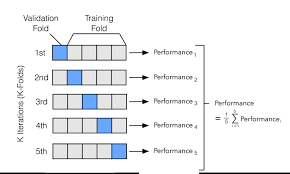

Here are the guidelines on when to select what value of K:

The standard value of K is 10 and used with the data of decent size.

For a very large data set, one can use the value of K as 5 (K-5). One can obtain an accurate estimate of the average performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds.

The number of folds increases if the data is relatively small. However, larger values of k results in the increase of the runtime of the cross-validation algorithm. This yield model performance estimates with higher variance, since the training folds become smaller.

For very small data sets, leave-one-out cross-validation (LOOCV) technique is used. In this technique, the validation data consists of just one record.

In [170]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [171]:
#use this to check the evaluation scores availble for use in your validation
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [172]:
#I will be using 'r' evaluation metric to carry out validation on the linear regression model
scores=cross_val_score(xgb_model2, X_train,y_train, scoring='r2', cv=10)

def display_scores(scores):
    print ('scores:', scores)
    print('mean:', scores.mean())
    print('standard deviation:', scores.std())
    
display_scores(scores)

scores: [0.69208308 0.68025262 0.68962425 0.66308057 0.64189026 0.62368403
 0.6357334  0.59664629 0.63803663 0.59345012]
mean: 0.645448125016027
standard deviation: 0.03371892261535421


Interpreting this we can say that our model has an actual r2 score of 64% +/- 3.3%

In [173]:
import pickle
from pickle import dump

In [174]:
# save the model
dump(xgb_model2, open('model(xg).pkl', 'wb'))
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# load the model from disk
model=pickle.load(open('model(xg).pkl', 'rb'))
model

In [ ]:
#load our scaler
scaler=pickle.load(open('scaler.pkl', 'rb'))
scaler

In [ ]:
df=pd.read_excel('NEW.xlsx')
df

### Creating Prediction Pipeline

In [ ]:
#drop unused columns
df=df.drop(['number_of_reviews','id','name','host_id','host_name','last_review','reviews_per_month'],axis=1)

In [ ]:
df.head(5)

'North Region' 'Central Region' 'East Region' 'West Region'

 'North-East Region']
    
room_type

['Private room' 'Entire home/apt' 'Shared room']

In [ ]:
#replicate the dummy encoding
df['Central Region']=[1,2,3,4,5]
df['Entire home/apt']=[1,2,3,4,5]
for i in list(range(0,(len(df)))):

    if df['neighbourhood_group'][i]=='Central Region':
        df['Central Region'][i]=1
    else:
        df['Central Region'][i]=0 

    if df['room_type'][i]=='Entire home/apt':
        df['Entire home/apt'][i]=1 
    else:
        df['Entire home/apt'][i]=0

df=df.drop(['room_type','neighbourhood_group'],axis=1)

        

In [ ]:
#containerize all into a function
def categorizer(df):
    df=df.drop(['number_of_reviews','id','name','host_id','host_name','last_review','reviews_per_month'],axis=1)
    df['Central Region']=[1,2,3,4,5]
    df['Entire home/apt']=[1,2,3,4,5]
    for i in list(range(0,(len(df)))):

        if df['neighbourhood_group'][i]=='Central Region':
            df['Central Region'][i]=1
        else:
            df['Central Region'][i]=0 

        if df['room_type'][i]=='Entire home/apt':
            df['Entire home/apt'][i]=1 
        else:
            df['Entire home/apt'][i]=0

    df=df.drop(['room_type','neighbourhood_group'],axis=1)
    return df
        
      

In [ ]:
df=categorizer(df)

In [ ]:
categorizer(df)

In [ ]:
X=scaler.transform(df)

In [ ]:
#
model.predict(X)

In [ ]:
#return prediction attached to the original table
def predict(df):
    import pandas as pd
    from sklearn.preprocessing import StandardScaler 
    df=categorizer(df)
    X=scaler.transform(df)
    results=model.predict(X)
    results=pd.DataFrame({'Results':results})
    df['Results']=results
    
    return df
    

In [ ]:
predict(df)

In [ ]:
%%writefile fff.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.write("""
# AIRBNB HOUSE PRICE PREDICT APP!
""")

model=pickle.load(open('model(xg).pkl', 'rb'))

scaler=pickle.load(open('Scal_func', 'rb'))



st.sidebar.header('User Input Parameters')

def user_input_features():
    Room_type= st.sidebar.selectbox('Room Type',('Private room','Entire home/apt','Shared room'))
    if Room_type=='Entire home/apt':
        Room_type=1
    else:
        Room_type=0 
        
    Region_hood= st.sidebar.selectbox('Region',('North Region','Central Region','East Region','West Region','North-East Region'))
    if Region_hood=='Central Region':
        Region_hood=1
    else:
        Region_hood=0

        
    Latitude = st.number_input('Latitude')
    Longitude = st.number_input('Longitude')
    Nights = st.number_input('Minimum Nights Stay')
    HL_count = st.number_input('Host Listing Count')
    Availability=st.number_input('No of Days Available')
    
    data = {'latitude':Latitude,
            'longitude': Longitude ,
            'minimum_nights':Nights,
            'calculated_host_listings_count': HL_count,
            'availability_365':Availability,
            'Entire home/apt':Room_type,
            'Central Region':Region_hood}
    
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()
input_df=scaler.transform(input_df)


if st.button('PREDICT'):
    y_out=model.predict(input_df)
    st.write(f' This room will cost you $',y_out[0])



In [ ]:
!streamlit run fff.py 

In [ ]:
4*2

In [ ]:
p={'People':['Race','Religion','Gender'],'Product':[6373,7835,20097]}

In [ ]:
p.keys()

In [ ]:
p.values()

In [ ]:
pd.DataFrame(p)

In [ ]:
m=pd.DataFrame({'Score':[7,8,4,3]})
m

In [ ]:
m.apply(lambda x:x%2)

In [ ]:
m.apply(lambda x:x[2])

In [ ]:
2**2 

In [ ]:
(9/4).split('.')[1]

In [ ]:
x==x%2